In [1]:
%matplotlib inline

In [2]:
import imp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Load library NeV
NeV = imp.load_source('NeVLib',"../NeV/Lib.py")
Lib = NeV.CSVLib
    

In [3]:
train = Lib.read_csv_data("./handwritten/train.csv")
test  = Lib.read_csv_data("./handwritten/test.csv")

In [35]:
# Convert all data is not equal 0 = -1
p = 1
while p <= 9:
    train['label'] = Lib.replace_all_text_in_column('label', p , 1, train)
    p += 1
    
train

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          1       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
5          0       0       0       0       0       0       0       0       0   
6          1       0       0       0       0       0       0       0       0   
7          1       0       0       0       0       0       0       0       0   
8          1       0       0       0       0       0       0       0       0   
9          1       0       0       0       0       0       0       0       0   
10         1       0       0       0       0       0       0       0       0   
11         1       0       0       0       0       0       0       0       0   
12         1       0       0       0       0       0       0       0       0   
13         1       0       0       0       0       0       0       0       0   
14         1       0       0       0       0       0       0       0       0   
15         1       0       0       0       0       0       0       0       0   
16         1       0       0       0       0       0       0       0       0   
17         0       0       0       0       0       0       0       0       0   
18         1       0       0       0       0       0       0       0       0   
19         1       0       0       0       0       0       0       0       0   
20         1       0       0       0       0       0       0       0       0   
21         1       0       0       0       0       0       0       0       0   
22         1       0       0       0       0       0       0       0       0   
23         0       0       0       0       0       0       0       0       0   
24         1       0       0       0       0       0       0       0       0   
25         1       0       0       0       0       0       0       0       0   
26         1       0       0       0       0       0       0       0       0   
27         1       0       0       0       0       0       0       0       0   
28         1       0       0       0       0       0       0       0       0   
29         1       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41970      1       0       0       0       0       0       0       0       0   
41971      1       0       0       0       0       0       0       0       0   
41972      1       0       0       0       0       0       0       0       0   
41973      1       0       0       0       0       0       0       0       0   
41974      1       0       0       0       0       0       0       0       0   
41975      1       0       0       0       0       0       0       0       0   
41976      1       0       0       0       0       0       0       0       0   
41977      1       0       0       0       0       0       0       0       0   
41978      1       0       0       0       0       0       0       0       0   
41979      1       0       0       0       0       0       0       0       0   
41980      1       0       0       0       0       0       0       0       0   
41981      1       0       0       0       0       0       0       0       0   
41982      1       0       0       0       0       0       0       0       0   
41983      1       0       0       0       0       0       0       0       0   
41984      1       0       0       0       0       0       0       0       0   
41985      1       0       0       0       0       0       0       0       0   
41986      0       0       0       0       0       0       0       0       0   
41987      1       0       0       0       0       0       0       0       0   
41988  

In [36]:
# Shuffle data
train = Lib.shuffle_csv_data(train)
# Split data
train_80, train_20 = Lib.split_csv_data(80, train)

In [37]:
# Seperate output and input

# train_80_label = np.asmatrix(np.ascontiguousarray(train_80.loc[:,'label'], dtype=np.int64))
# train_80_data = np.asmatrix(np.ascontiguousarray(train_80.loc[:,'pixel0':], dtype=np.int64))

train_80_label, train_80_data = Lib.get_output_input(train_80, 'label', np.int64, 'pixel0', np.int64)
train_20_label, train_20_data = Lib.get_output_input(train_20, 'label', np.int64, 'pixel0', np.int64)

In [38]:
# Check how many 0 and how many 1
print(Lib.filter_output('label', ['1'], train_80).shape)
print(Lib.filter_output('label', ['0'], train_80).shape)

(30305, 785)
(3295, 785)


In [39]:
# Convert train data to XBar
train_80_data_XBar_T = Lib.convert_XBar(train_80_data).T
train_20_data_XBar_T = Lib.convert_XBar(train_20_data).T

print(train_80_data_XBar_T.shape)
print(train_80_label.shape)

(785, 33600)
(1, 33600)


In [8]:
# Sigmoid function

def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_epoch = 10000):
    w = [w_init]    
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    epoch = 0
    check_w_after = 20
    while epoch < max_epoch:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            print("Epoch:" + str(epoch))
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            yi_flatten = np.array(eta*(yi - zi)).ravel()[0] # Remove all bracket just get the int only
            w_new = w[-1] + yi_flatten*xi
            epoch += 1
            # stopping criteria
            if epoch%check_w_after == 0:                
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    print("Train finish after epoch:" + str(epoch))
                    return w
            w.append(w_new)
    print("Train finish after epoch:" + str(epoch))
    return w

In [ ]:
# Set training value
eta = .9 
d = train_80_data_XBar_T.shape[0]
w_init = np.random.randn(d, 1)
y = np.array(train_80_label).ravel()

In [ ]:
w_init.shape

In [ ]:
# Trainning

w = logistic_sigmoid_regression(train_80_data_XBar_T, y, w_init, eta)

In [ ]:
# Testing

# Convert to dtype = int64
testResult = (sigmoid(np.dot(w[-1].T, train_20_data_XBar_T))).astype(np.int64)

# Flatten array
testResult = np.array(testResult).ravel()
testLabel = np.array(train_20_label).ravel()

# Get % Error
t = 0
m = 0
while t < len(testResult):
#     print(t)
    if testResult[t] != testLabel[t]:
        m +=1
    t += 1

print("Error: " + str(m * 100 /len(testResult)) + "%")

In [6]:
# Shuffle test data
test = Lib.shuffle_csv_data(test)
testdata = np.asmatrix(test.loc[:,'pixel0':])
testdata

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
# Draw and test
import time

sample = 100
line = 0
while line < sample:
    frame = np.reshape(testdata[line],(28,28)) 
    plt.imshow(frame)
    plt.show()
    testdata_Bar = Lib.convert_XBar(testdata[line])
    testdata_Bar = testdata_Bar.T
    test_result = Lib.flatten_array(sigmoid(np.dot(w[-1].T, testdata_Bar)))[0]
    if test_result == 0:
        print("It is the number 0")
    else:
        print("NOT 0")
    time.sleep(1)
    line += 1

In [ ]:
# Saving model
# import h5py
# h5f = h5py.File('data_train_98.h5', 'w')
# h5f.create_dataset('dataset_98', data=w[-1])
# h5f.close()

In [4]:
# Read model
import h5py
h5f = h5py.File('data_train_98.h5','r')
w_model = h5f['dataset_98'][:]
h5f.close()

D:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [ ]:
# w_model

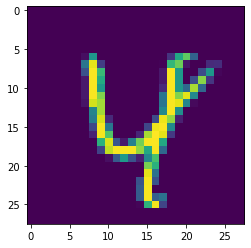

NOT 0


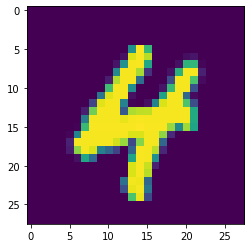

NOT 0


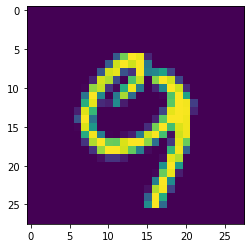

NOT 0


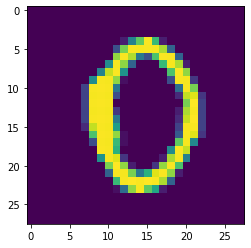

It is the number 0


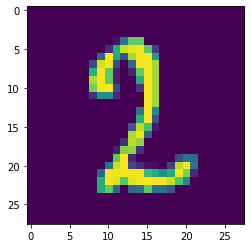

NOT 0


NOT 0


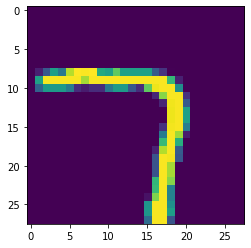

NOT 0


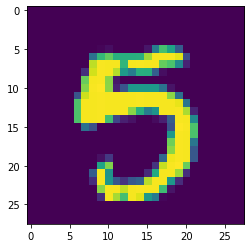

NOT 0


NOT 0


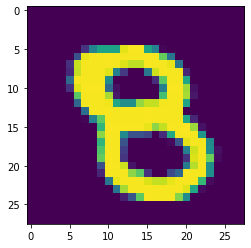

NOT 0


NOT 0


NOT 0


NOT 0


NOT 0


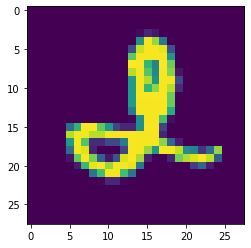

NOT 0


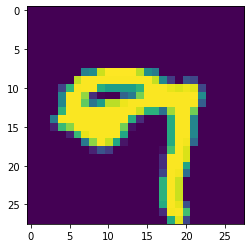

NOT 0


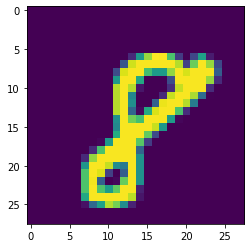

NOT 0


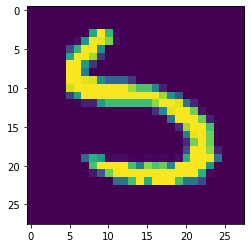

NOT 0


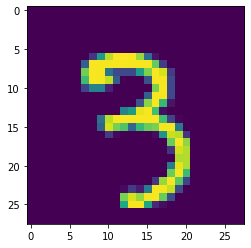

NOT 0


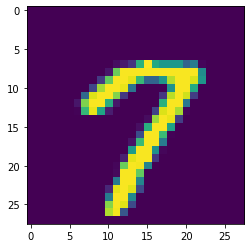

NOT 0


It is the number 0


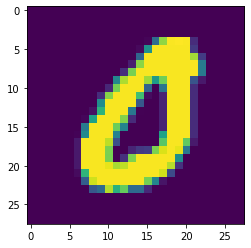

It is the number 0


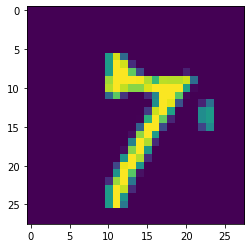

NOT 0


It is the number 0


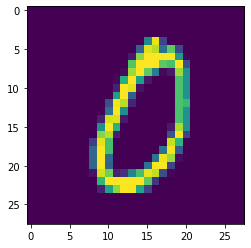

It is the number 0


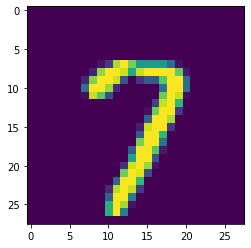

NOT 0


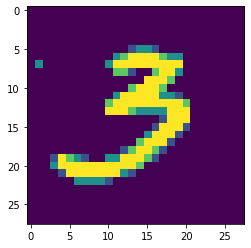

NOT 0


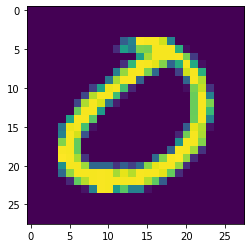

It is the number 0


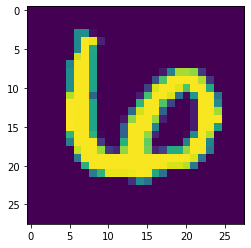

NOT 0


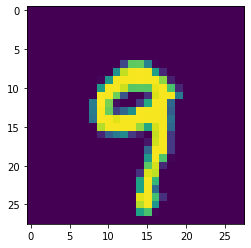

NOT 0


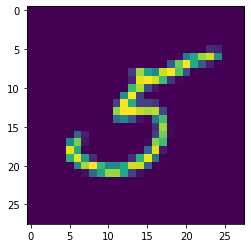

NOT 0


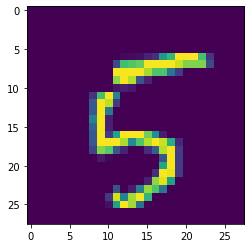

It is the number 0


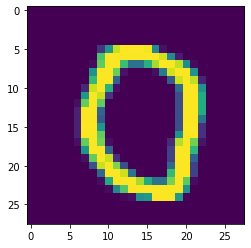

It is the number 0


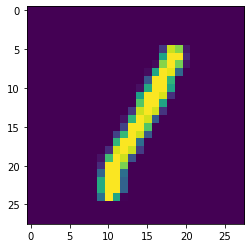

NOT 0


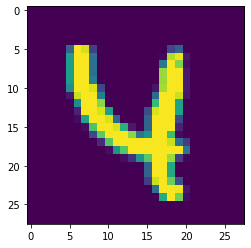

NOT 0


NOT 0


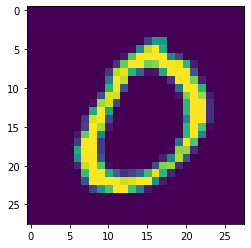

It is the number 0


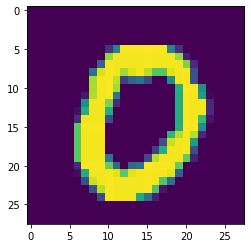

It is the number 0


NOT 0


NOT 0


NOT 0


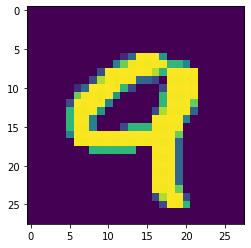

NOT 0


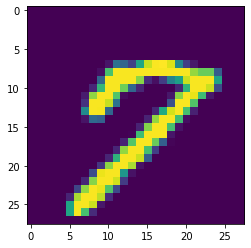

NOT 0


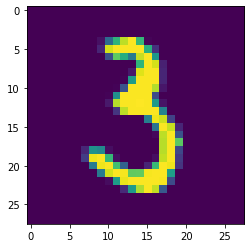

NOT 0


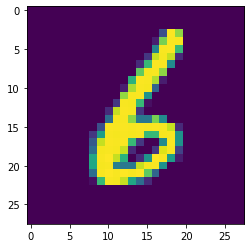

NOT 0


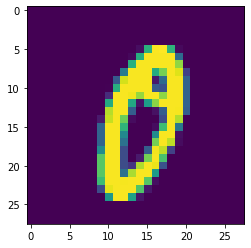

NOT 0


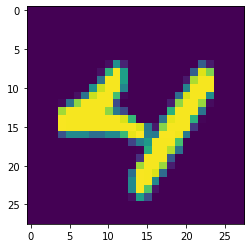

NOT 0


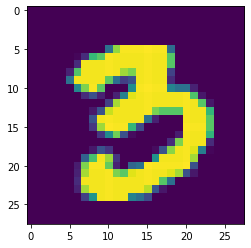

NOT 0


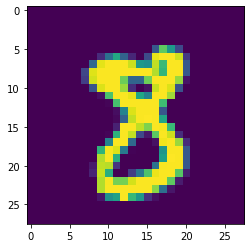

NOT 0


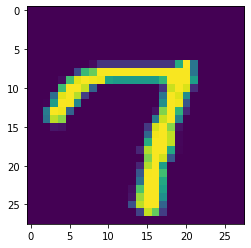

NOT 0


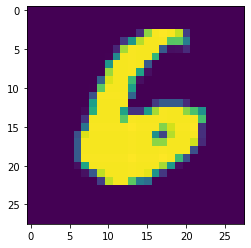

NOT 0


It is the number 0


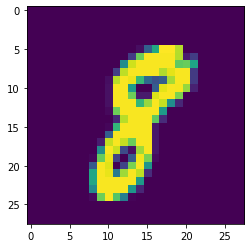

NOT 0


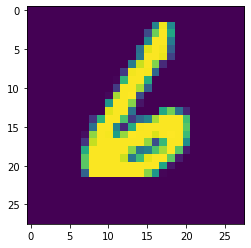

NOT 0


NOT 0


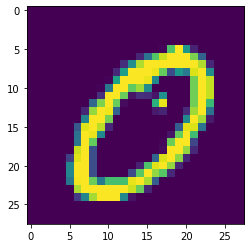

It is the number 0


NOT 0


NOT 0


It is the number 0


NOT 0


NOT 0


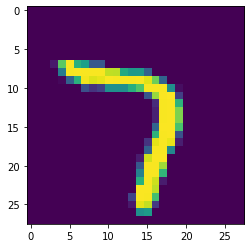

NOT 0


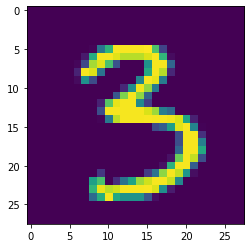

NOT 0


It is the number 0


NOT 0


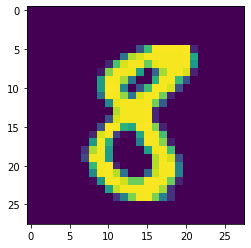

NOT 0


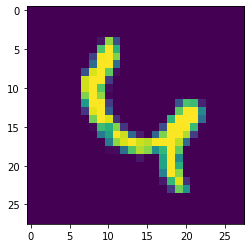

NOT 0


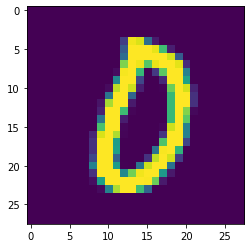

It is the number 0


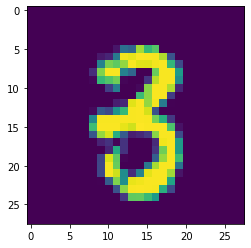

NOT 0


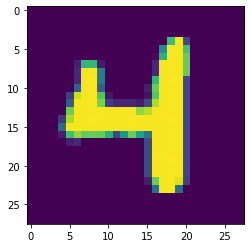

NOT 0


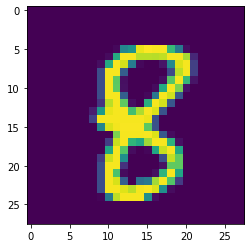

NOT 0


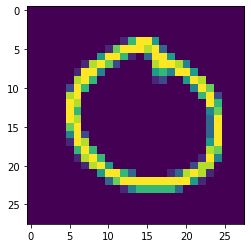

It is the number 0


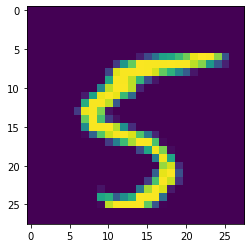

It is the number 0


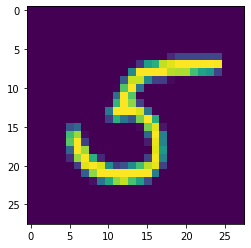

NOT 0


NOT 0


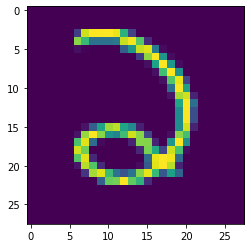

NOT 0


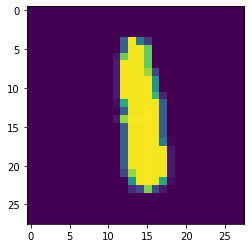

NOT 0


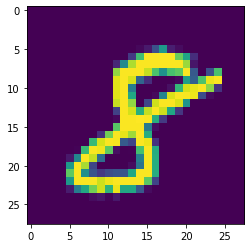

NOT 0


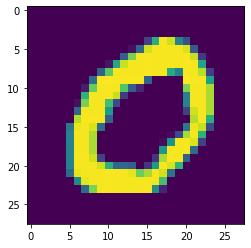

It is the number 0


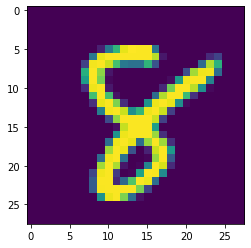

NOT 0


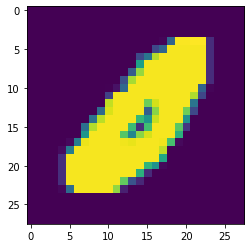

NOT 0


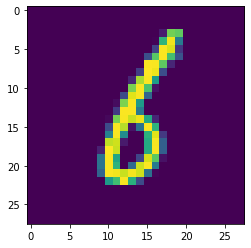

NOT 0


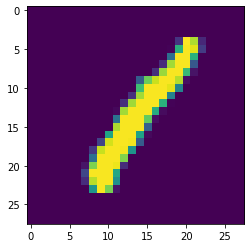

NOT 0


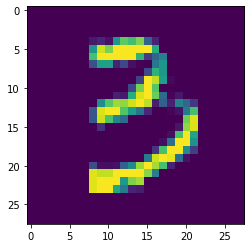

NOT 0


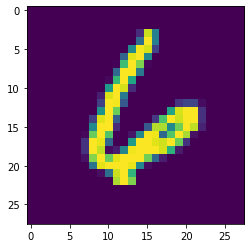

NOT 0


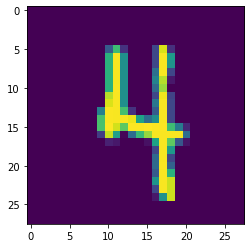

NOT 0


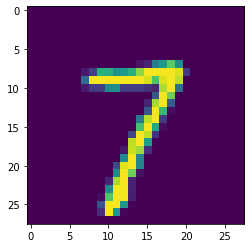

NOT 0


NOT 0


NOT 0


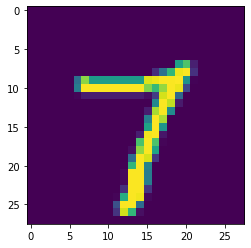

NOT 0


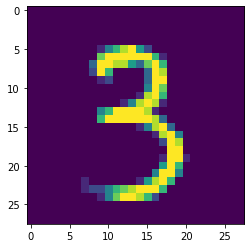

NOT 0


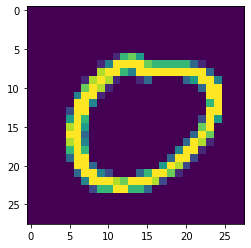

It is the number 0


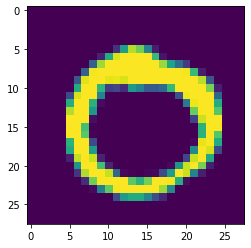

It is the number 0


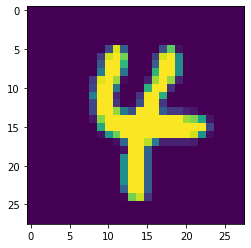

NOT 0


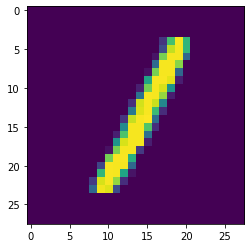

NOT 0


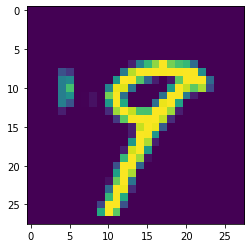

NOT 0


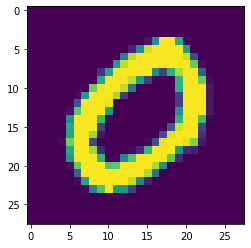

It is the number 0


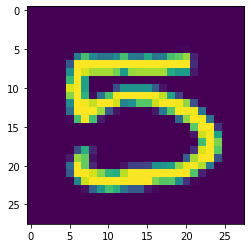

It is the number 0


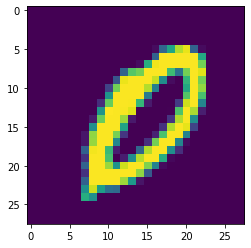

It is the number 0


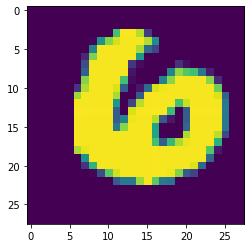

NOT 0


In [16]:
import time

sample = 100
startfrom = 3000
line = 0
while line < sample:
    frame = np.reshape(testdata[line + startfrom],(28,28)) 
    plt.imshow(frame)
    plt.show()
    testdata_Bar = Lib.convert_XBar(testdata[line + startfrom])
    testdata_Bar = testdata_Bar.T
#     print(sigmoid(Lib.flatten_array(np.dot(w_model.T, testdata_Bar))[0]))
#     print(Lib.flatten_array(np.dot(w_model.T, testdata_Bar))[0])
    test_result = Lib.flatten_array(sigmoid(np.dot(w_model.T, testdata_Bar)))[0]
    if test_result == 0:
        print("It is the number 0")
    else:
        print("NOT 0")
    time.sleep(1)
    line += 1

In [17]:
# Trainning 5 and 0
train_5_0 = Lib.read_csv_data("./handwritten/train.csv")

In [23]:
# Get data 0, 5
train_5_0 = Lib.filter_output('label', ['0','5'], train_5_0)

In [25]:
train_5_0['label'] = Lib.replace_all_text_in_column('label', 5 , 1, train_5_0)

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
train_5_0_label, train_5_0_data = Lib.get_output_input(train_5_0, 'label', np.int64, 'pixel0', np.int64)

In [30]:
train_5_0_data_XBar_T = Lib.convert_XBar(train_5_0_data).T

In [31]:
# Set training value
eta = .9 
d = train_5_0_data_XBar_T.shape[0]
w_init = w_model
y = np.array(train_5_0_label).ravel()

In [32]:
w_5_0 = logistic_sigmoid_regression(train_5_0_data_XBar_T, y, w_init, eta)

Epoch:0
Epoch:1
Epoch:2
Epoch:3
Epoch:4
Epoch:5
Epoch:6
Epoch:7
Epoch:8
Epoch:9
Epoch:10
Epoch:11
Epoch:12
Epoch:13
Epoch:14
Epoch:15
Epoch:16
Epoch:17
Epoch:18
Epoch:19
Epoch:20
Epoch:21
Epoch:22
Epoch:23
Epoch:24
Epoch:25
Epoch:26
Epoch:27
Epoch:28
Epoch:29
Epoch:30
Epoch:31
Epoch:32
Epoch:33
Epoch:34
Epoch:35
Epoch:36
Epoch:37
Epoch:38
Epoch:39
Train finish after epoch:40


In [40]:
# Testing

# Convert to dtype = int64
testResult = (sigmoid(np.dot(w_5_0[-1].T, train_20_data_XBar_T))).astype(np.int64)

# Flatten array
testResult = np.array(testResult).ravel()
testLabel = np.array(train_20_label).ravel()

# Get % Error
t = 0
m = 0
while t < len(testResult):
#     print(t)
    if testResult[t] != testLabel[t]:
        m +=1
    t += 1

print("Error: " + str(m * 100 /len(testResult)) + "%")

Error: 11.321428571428571%


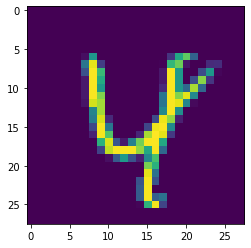

NOT 0


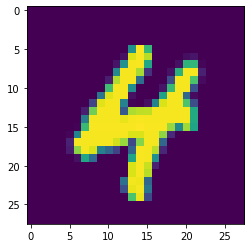

NOT 0


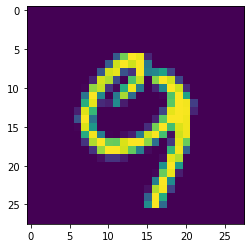

It is the number 0


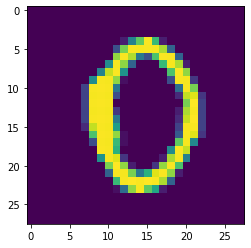

It is the number 0


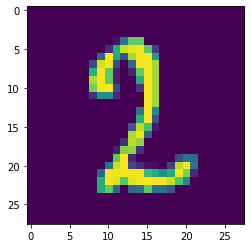

NOT 0


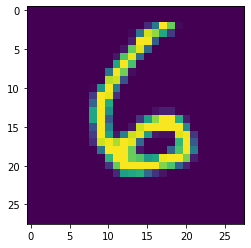

NOT 0


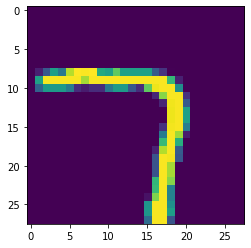

NOT 0


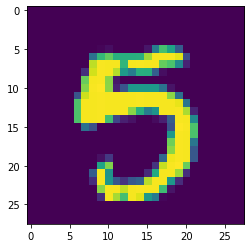

NOT 0


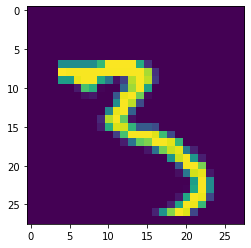

NOT 0


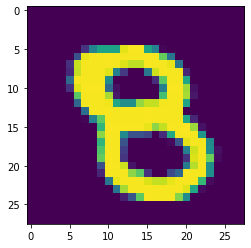

NOT 0


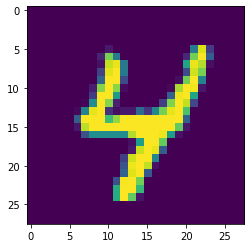

NOT 0


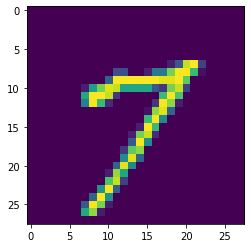

NOT 0


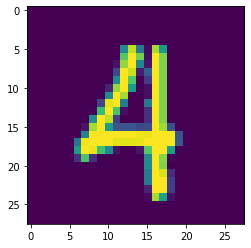

NOT 0


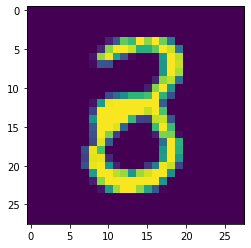

NOT 0


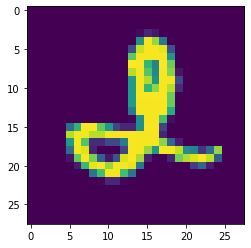

NOT 0


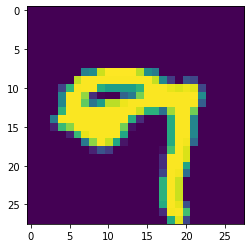

NOT 0


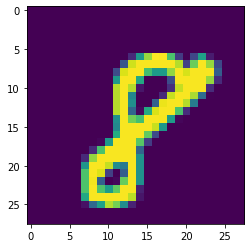

NOT 0


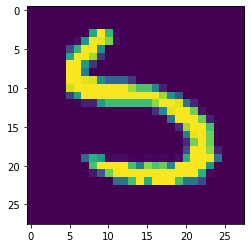

NOT 0


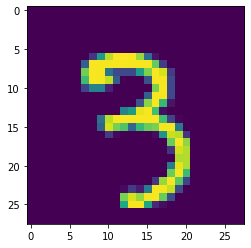

NOT 0


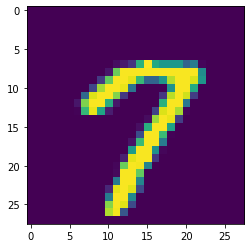

NOT 0


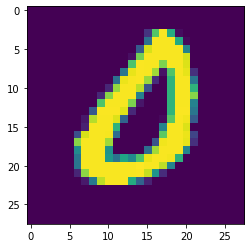

It is the number 0


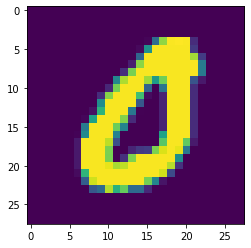

It is the number 0


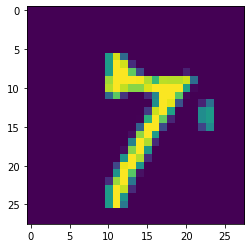

NOT 0


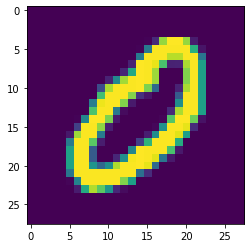

It is the number 0


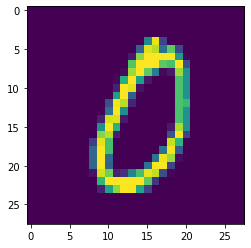

NOT 0


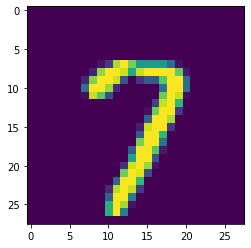

NOT 0


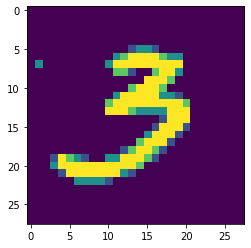

NOT 0


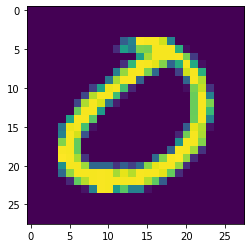

It is the number 0


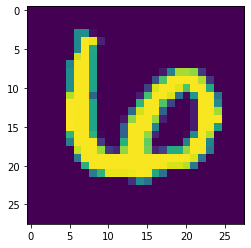

NOT 0


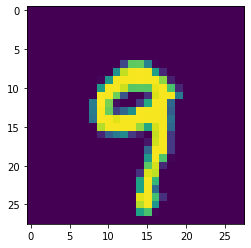

NOT 0


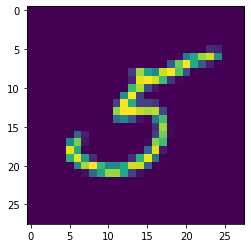

NOT 0


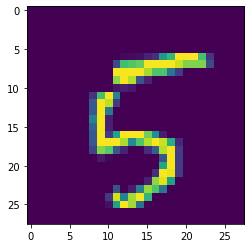

NOT 0


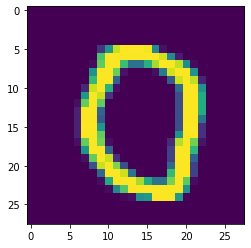

It is the number 0


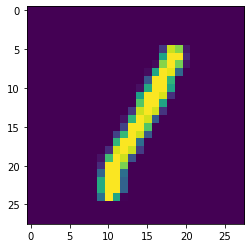

NOT 0


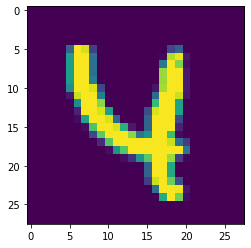

NOT 0


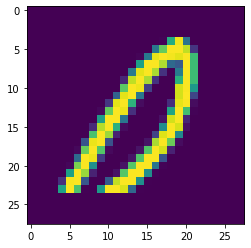

NOT 0


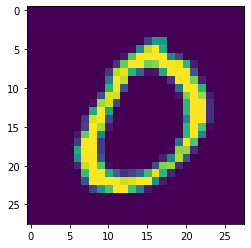

It is the number 0


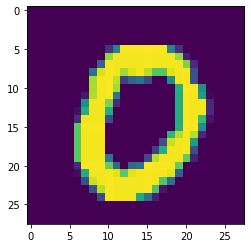

It is the number 0


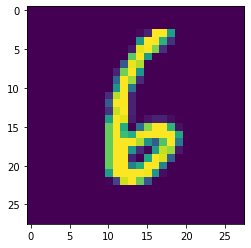

NOT 0


NOT 0


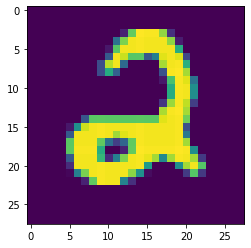

It is the number 0


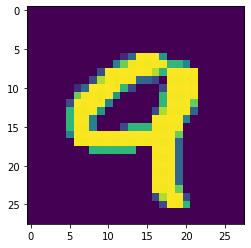

It is the number 0


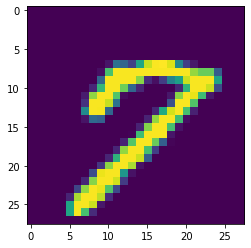

NOT 0


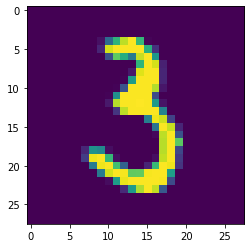

NOT 0


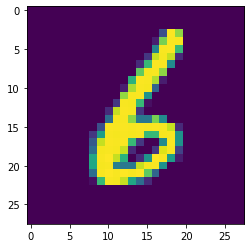

NOT 0


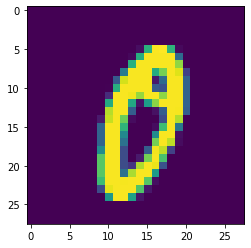

NOT 0


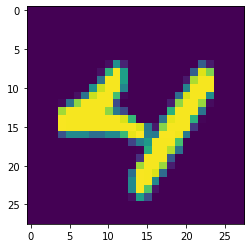

It is the number 0


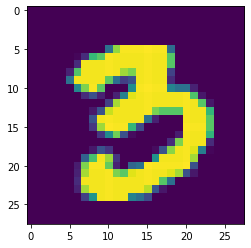

NOT 0


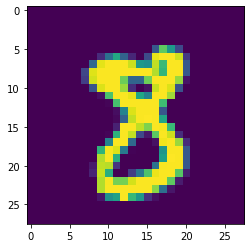

NOT 0


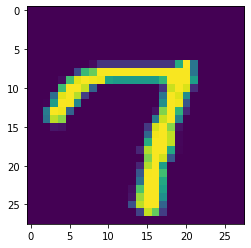

NOT 0


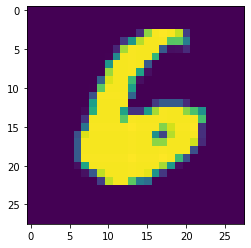

NOT 0


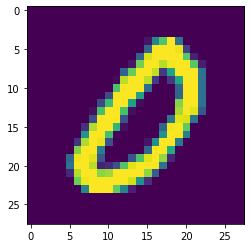

It is the number 0


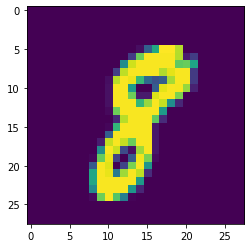

NOT 0


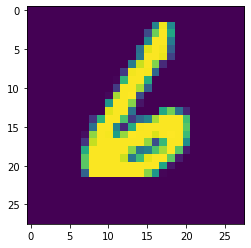

NOT 0


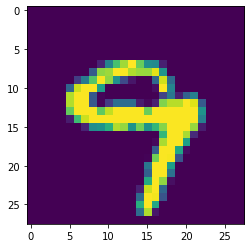

NOT 0


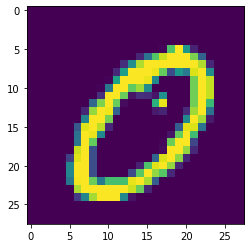

It is the number 0


NOT 0


NOT 0


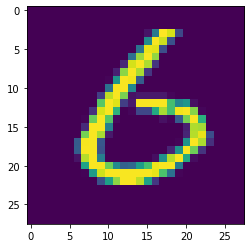

NOT 0


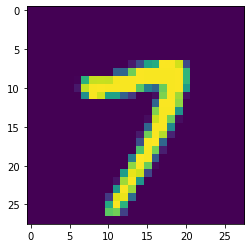

NOT 0


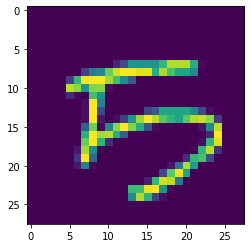

NOT 0


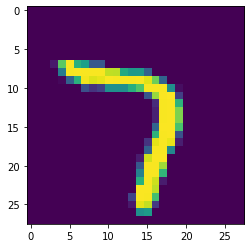

NOT 0


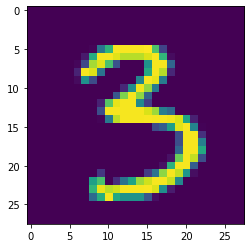

NOT 0


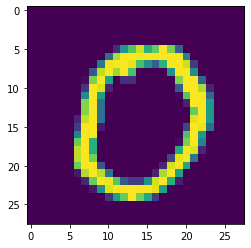

It is the number 0


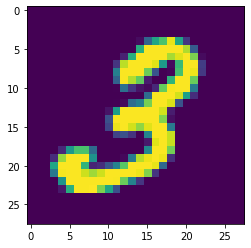

NOT 0


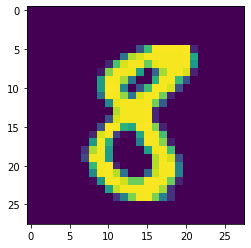

NOT 0


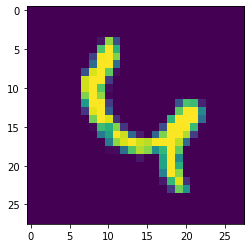

It is the number 0


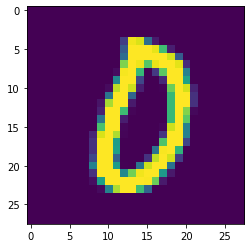

NOT 0


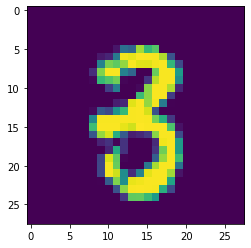

NOT 0


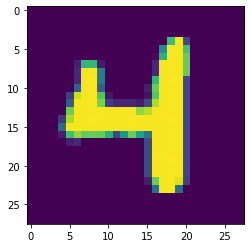

NOT 0


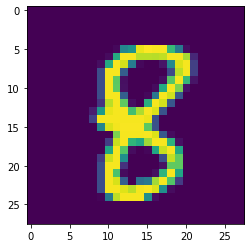

NOT 0


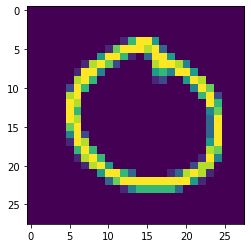

It is the number 0


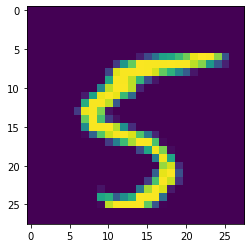

NOT 0


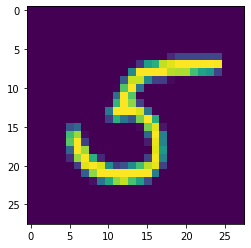

NOT 0


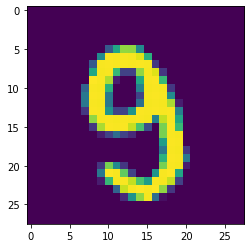

NOT 0


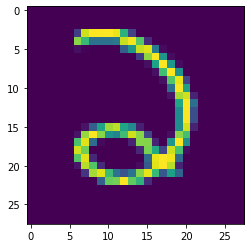

It is the number 0


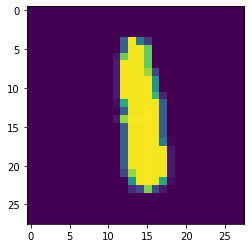

NOT 0


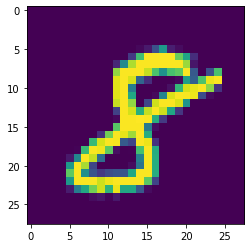

NOT 0


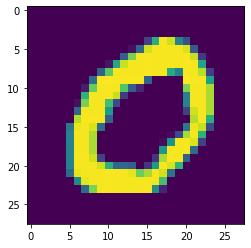

It is the number 0


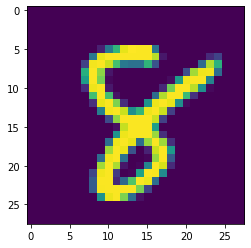

NOT 0


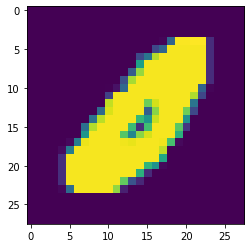

NOT 0


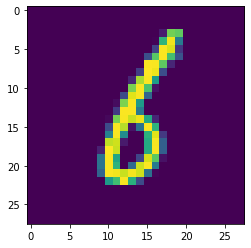

NOT 0


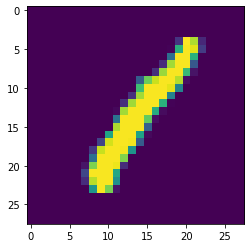

NOT 0


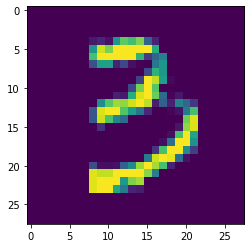

NOT 0


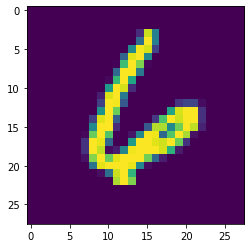

It is the number 0


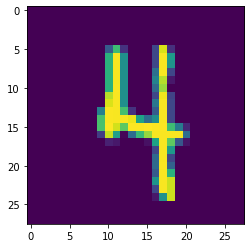

NOT 0


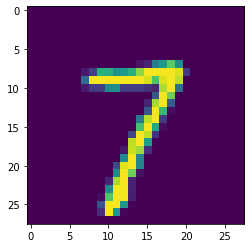

NOT 0


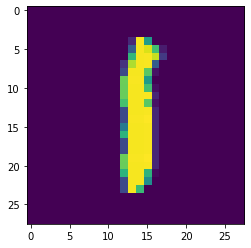

NOT 0


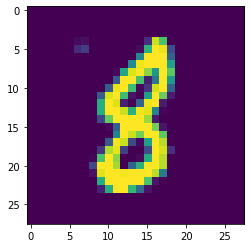

NOT 0


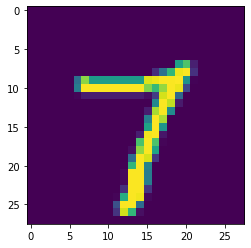

NOT 0


KeyboardInterrupt: 

In [33]:
import time

sample = 100
startfrom = 3000
line = 0
while line < sample:
    frame = np.reshape(testdata[line + startfrom],(28,28)) 
    plt.imshow(frame)
    plt.show()
    testdata_Bar = Lib.convert_XBar(testdata[line + startfrom])
    testdata_Bar = testdata_Bar.T
#     print(sigmoid(Lib.flatten_array(np.dot(w_model.T, testdata_Bar))[0]))
#     print(Lib.flatten_array(np.dot(w_model.T, testdata_Bar))[0])
    test_result = Lib.flatten_array(sigmoid(np.dot(w_5_0[-1].T, testdata_Bar)))[0]
    if test_result == 0:
        print("It is the number 0")
    else:
        print("NOT 0")
    time.sleep(1)
    line += 1